<a href="https://colab.research.google.com/github/kasalehi/LogistRegression_with_Tensorflow/blob/main/logistregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
import matplotlib.pyplot as plt

In [4]:
# lets bring data
from google.colab import files
uploaded=files.upload()


Saving tested.csv to tested.csv


In [5]:
# let read the data
df=pd.read_csv('tested.csv')

In [6]:
# lets see the info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [10]:
df.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Embarked,0


In [19]:
df=df.drop(['Name'], axis=1)

In [20]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [21]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [22]:
x=df.drop('Survived', axis=1)
y=df['Survived']

In [23]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.2, random_state=42)

In [24]:
# lets classified the columns

num_cols=[]
cat_cols=[]

for col in x_train.columns:
  if x_train[col].dtype=='object':
    cat_cols.append(col)
  else:
    num_cols.append(col)

In [25]:
cat_cols, num_cols

(['Sex', 'Ticket', 'Embarked'], ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])

In [26]:
# lets make column transformer

ct=make_column_transformer(
    (MinMaxScaler(), num_cols),
    (OneHotEncoder(handle_unknown='ignore'), cat_cols)

)

ct.fit(x_train)

x_train_norm=ct.transform(x_train)
x_test_norm=ct.transform(x_test)

In [32]:
from re import VERBOSE
# lets create the model
tf.random.set_seed(42)
model= tf.keras.models.Sequential([

     tf.keras.layers.Dense(4),
     tf.keras.layers.Dense(4, activation='relu'),
     tf.keras.layers.Dense(4, activation='relu'),
     tf.keras.layers.Dense(1, activation='sigmoid')



])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

best_lr= tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-4*10**(epochs/20))

history=model.fit(x_train_norm, y_train,
          validation_data=(x_test_norm, y_test),
          epochs=100,
          callbacks=[best_lr]

          )

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 599ms/step - accuracy: 0.3089 - loss: 0.7090 - val_accuracy: 0.4048 - val_loss: 0.7019 - learning_rate: 1.0000e-04
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3240 - loss: 0.7074 - val_accuracy: 0.3929 - val_loss: 0.7000 - learning_rate: 1.1220e-04
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3231 - loss: 0.7056 - val_accuracy: 0.4048 - val_loss: 0.6981 - learning_rate: 1.2589e-04
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3261 - loss: 0.7038 - val_accuracy: 0.4405 - val_loss: 0.6963 - learning_rate: 1.4125e-04
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3369 - loss: 0.7019 - val_accuracy: 0.3929 - val_loss: 0.6944 - learning_rate: 1.5849e-04
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3501 - loss: 0.6999 - val_accuracy: 0.5595 - val_loss: 0.6926 - learning_rate: 1.7783e-04
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy:

In [33]:
#lets see the summary of model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 4)              │         1,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,761 (14.70 KB)

 Trainable params: 1,253 (4.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,508 (9.80 KB)

<Axes: >

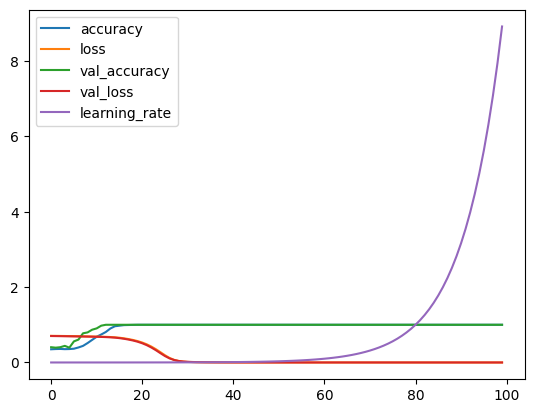

In [34]:
# lets draw the loss function

pd.DataFrame(history.history).plot()


/tmp/ipython-input-3335492341.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


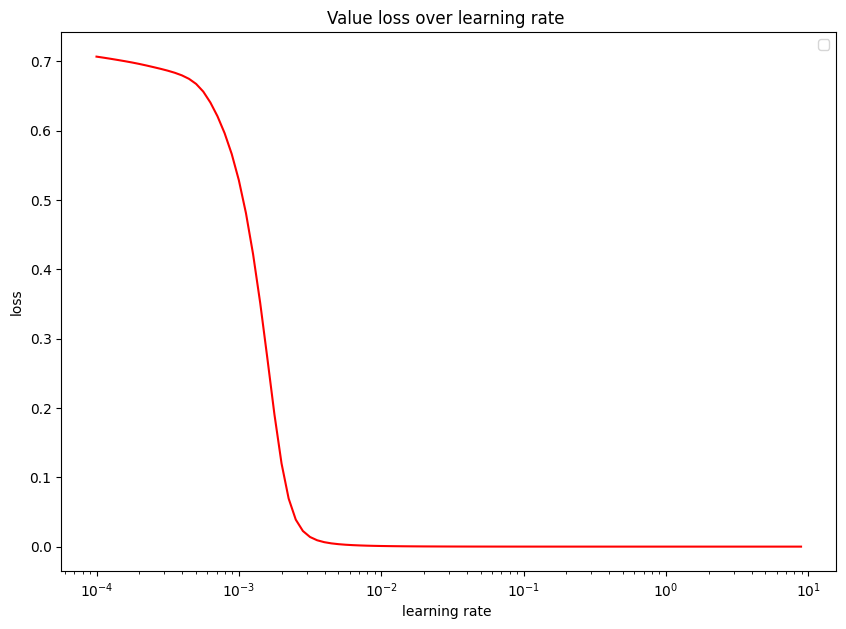

In [40]:
#lets look at the losss more deeper
lr=1e-4*10**(tf.range(100)/20)
plt.figure(figsize=(10,7))
plt.semilogx(lr, history.history['loss'], c='r')
plt.title('Value loss over learning rate ')
plt.xlabel('learning rate ')
plt.ylabel('loss')
plt.legend()
plt.show()

# according to above loss value , trhe best rlearning rate must be the in interval 1e-3, 1e-2, which is corrcet in most cases :)